In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()

llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

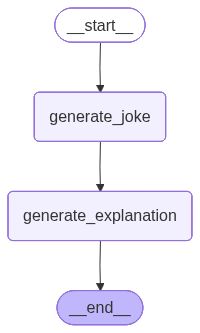

In [15]:
workflow

In [7]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the party? Because it wanted to be a little slice of heaven!',
 'explanation': 'This joke is a play on words, using the phrase "slice of heaven" which is often used to describe something that brings great joy or happiness. In this case, the pizza went to the party because it wanted to be a literal "slice" of heaven, as it is made up of slices of pizza. It\'s a light-hearted and punny way to explain why the pizza decided to attend the party.'}

In [8]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it wanted to be a little slice of heaven!', 'explanation': 'This joke is a play on words, using the phrase "slice of heaven" which is often used to describe something that brings great joy or happiness. In this case, the pizza went to the party because it wanted to be a literal "slice" of heaven, as it is made up of slices of pizza. It\'s a light-hearted and punny way to explain why the pizza decided to attend the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-ad28-641a-8002-3cf09748a532'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-02T18:16:28.226856+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-8084-6c7b-8001-b4647c0a4e52'}}, tasks=(), interrupts=())

In [9]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it wanted to be a little slice of heaven!', 'explanation': 'This joke is a play on words, using the phrase "slice of heaven" which is often used to describe something that brings great joy or happiness. In this case, the pizza went to the party because it wanted to be a literal "slice" of heaven, as it is made up of slices of pizza. It\'s a light-hearted and punny way to explain why the pizza decided to attend the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-ad28-641a-8002-3cf09748a532'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-02T18:16:28.226856+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-8084-6c7b-8001-b4647c0a4e52'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Beca

In [10]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta chef go to therapy? \n\nBecause he had too much emotional baggage-alaise!',
 'explanation': 'This joke is a play on words, using "baggage" in two different ways. In one sense, "baggage" refers to emotional issues or problems that someone may be carrying with them. In another sense, "baggage-Alaise" sounds like "baguette alaise," a type of French bread often served with pasta dishes.\n\nSo, the joke is essentially saying that the pasta chef went to therapy because he had too much emotional baggage (issues) - but instead of just leaving it at that, it adds a humorous twist by incorporating a play on words with a type of bread commonly served with pasta dishes.'}

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it wanted to be a little slice of heaven!', 'explanation': 'This joke is a play on words, using the phrase "slice of heaven" which is often used to describe something that brings great joy or happiness. In this case, the pizza went to the party because it wanted to be a literal "slice" of heaven, as it is made up of slices of pizza. It\'s a light-hearted and punny way to explain why the pizza decided to attend the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-ad28-641a-8002-3cf09748a532'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-02T18:16:28.226856+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-8084-6c7b-8001-b4647c0a4e52'}}, tasks=(), interrupts=())

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it wanted to be a little slice of heaven!', 'explanation': 'This joke is a play on words, using the phrase "slice of heaven" which is often used to describe something that brings great joy or happiness. In this case, the pizza went to the party because it wanted to be a literal "slice" of heaven, as it is made up of slices of pizza. It\'s a light-hearted and punny way to explain why the pizza decided to attend the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-ad28-641a-8002-3cf09748a532'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-02T18:16:28.226856+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100634-8084-6c7b-8001-b4647c0a4e52'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Beca

### Time Travel

In [13]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f06cc6e-7232-6cb1-8000-f71609e6cec5'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [14]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})

EmptyInputError: Received no input for __start__

In [ ]:
list(workflow.get_state_history(config1))

#### Updating State

In [ ]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5", "checkpoint_ns": ""}}, {'topic':'samosa'})

In [ ]:
list(workflow.get_state_history(config1))

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc72-ca16-6359-8001-7eea05e07dd2"}})

In [ ]:
list(workflow.get_state_history(config1))

### Fault Tolerance

In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [ ]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [ ]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [ ]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))